# **Predicting Customer Buying Behaviour**

Using Scikit-Learn,<br>
Machine Learning algorithms can be used on the data to build a custom model to predict the Customer Behaviour.

Step 1: Get Data

In [3]:
import pandas as pd
import numpy as np
data = '/customer_booking.csv'
frame= pd.read_csv(data, encoding='ISO-8859-1')
frame.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
print(frame.shape)
print(frame.dtypes)

(50000, 14)
num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object


In [5]:
print(frame.isnull().sum())

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


As we can see, there are no null values in the dataset

In [6]:
print(frame['booking_complete'].value_counts())

0    42522
1     7478
Name: booking_complete, dtype: int64


# **Using sklearn to split the data**

In [7]:
from sklearn.model_selection import train_test_split
X= frame.drop(['booking_complete','sales_channel','trip_type','flight_day','route','booking_origin'],axis=1)
y=frame.booking_complete

X_train, X_valid, y_train, y_valid= train_test_split(X,y,random_state=1,test_size=0.3)


Creating a Sequential Layers and applying Batch Normlization and DropOut.<br>
Early Stopping to avoid Over-fitting the data.

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

model= keras.Sequential([
    layers.Dense(units=512,input_shape=[8], activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=16, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=1)
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
early_stopping=callbacks.EarlyStopping(
    min_delta=0.001,
    patience=50,
    restore_best_weights=True
)

history=model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=120,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
292/292 [==============================] - 8s 16ms/step - loss: 2.1891 - accuracy: 0.7556 - val_loss: 1.2195 - val_accuracy: 0.8493
Epoch 2/100
292/292 [==============================] - 5s 18ms/step - loss: 1.3447 - accuracy: 0.8121 - val_loss: 0.9477 - val_accuracy: 0.8493
Epoch 3/100
292/292 [==============================] - 5s 16ms/step - loss: 1.0358 - accuracy: 0.8307 - val_loss: 0.8531 - val_accuracy: 0.8416
Epoch 4/100
292/292 [==============================] - 4s 15ms/step - loss: 0.8523 - accuracy: 0.8406 - val_loss: 0.7154 - val_accuracy: 0.8486
Epoch 5/100
292/292 [==============================] - 6s 20ms/step - loss: 0.8183 - accuracy: 0.8363 - val_loss: 0.7555 - val_accuracy: 0.8493
Epoch 6/100
292/292 [==============================] - 4s 15ms/step - loss: 0.7362 - accuracy: 0.8404 - val_loss: 0.6324 - val_accuracy: 0.8493
Epoch 7/100
292/292 [==============================] - 5s 16ms/step - loss: 0.7385 - accuracy: 0.8440 - val_loss: 0.7563 - val_accuracy:

<ipython-input-9-566ade0a9f57>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Minimum Validation Loss: 0.4060


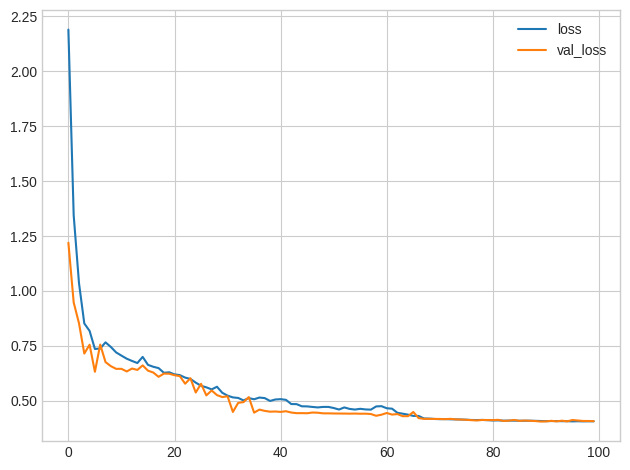

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [11]:
print(model.evaluate(X_valid, y_valid))

469/469 [==============================] - 1s 3ms/step - loss: 0.4077 - accuracy: 0.8493
[0.4076787233352661, 0.8492666482925415]
